In [1]:
import sys
import pandas as pd
sys.path.append('Model_Output')  # Add the directory containing your .py file to the system path
from output import ModelOutput  # Import your class from the .py file
from diagnostics import GenerationMixAnalyzer
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # For UserWarnings like CRS or centroid
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)  # For pandas SettingWithCopyWarning
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [2]:
# Instantiate the class
emission_capacity = ModelOutput()
# Load data (assuming this is a method inside your class)
emission_capacity.load_data()
emission_capacity.generation_county()

In [12]:
# Now, you can call the ask_emission_criteria() to ask the user for input
emission_capacity.ask_emission_criteria()

Exported data to All_PLCO2RTA_total_plant_emissions_export.csv
Map saved as 'All_CO2_total_emissions_map.html'.
Data has been exported to 'All_CO2_total_emissions_export.csv'.


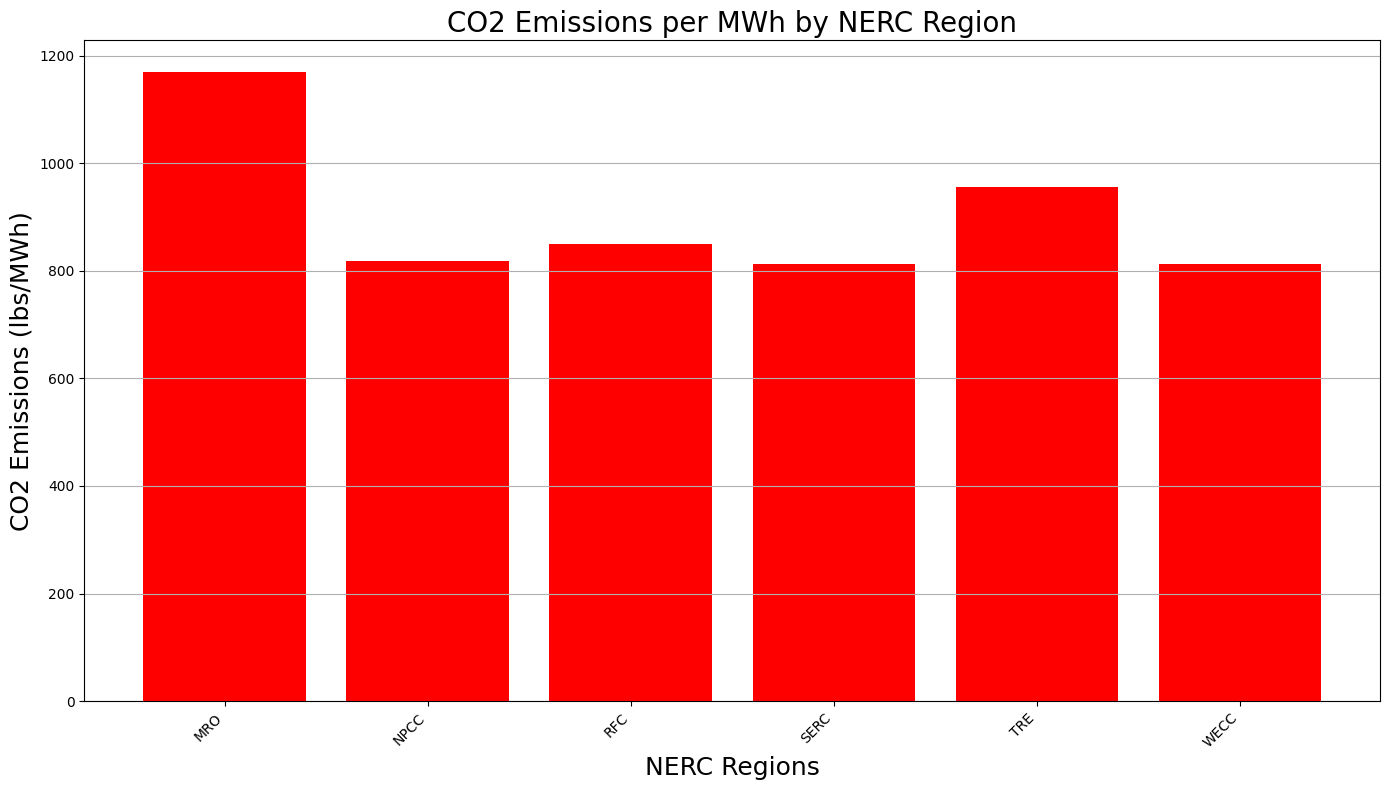

In [5]:
emission_capacity.plot_emissions()

In [11]:
# Generate the maps or other operations using methods
emission_capacity.create_capacity_map(save_as_html=True, html_filename='capacity_map.html')

In [4]:
analysis = GenerationMixAnalyzer()
analysis.load_data()
hourly_mix = analysis.get_hourly_gen_mix()
annual_mix = analysis.get_annual_gen_mix()


Total sum of fuel mix capacities: 32898836.475328628


In [5]:
analysis.compare_annual_mix_to_baseline(annual_mix)

                        Resource Percentage_Baseline Percentage_Model
0                        Biomass              1.300%           0.674%
1                           Coal             21.900%          23.170%
2                            Gas             38.400%          26.907%
3                     Geothermal              0.400%           0.665%
4                          Hydro              6.000%           9.380%
5                        Nuclear             18.900%          19.887%
6                            Oil              0.600%           0.000%
7                   Other Fossil              0.500%           0.000%
8   Other unknown/purchased fuel              0.100%           0.000%
9                          Solar              2.800%           1.932%
10                     Solar_New                 N/A           0.000%
11                          Wind              9.200%          17.385%
12                      Wind_New                 N/A           0.000%


/Users/haniftayarani/good_model/Model_Output/diagnostics.py:215: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  baseline_df = pd.concat([baseline_df, new_row], ignore_index=True)


/Users/haniftayarani/good_model/Model_Output/diagnostics.py:121: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  hourly_df = hourly_df.groupby(level=0, axis=1).sum()


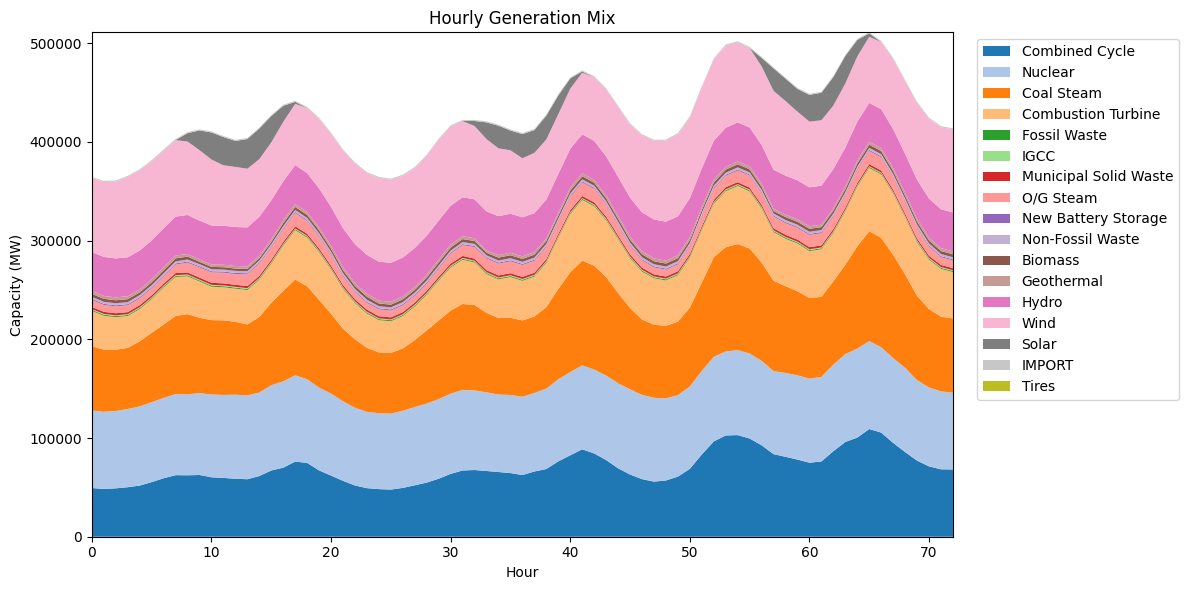

In [43]:
analysis.plot_hourly_gen_mix(hourly_mix)


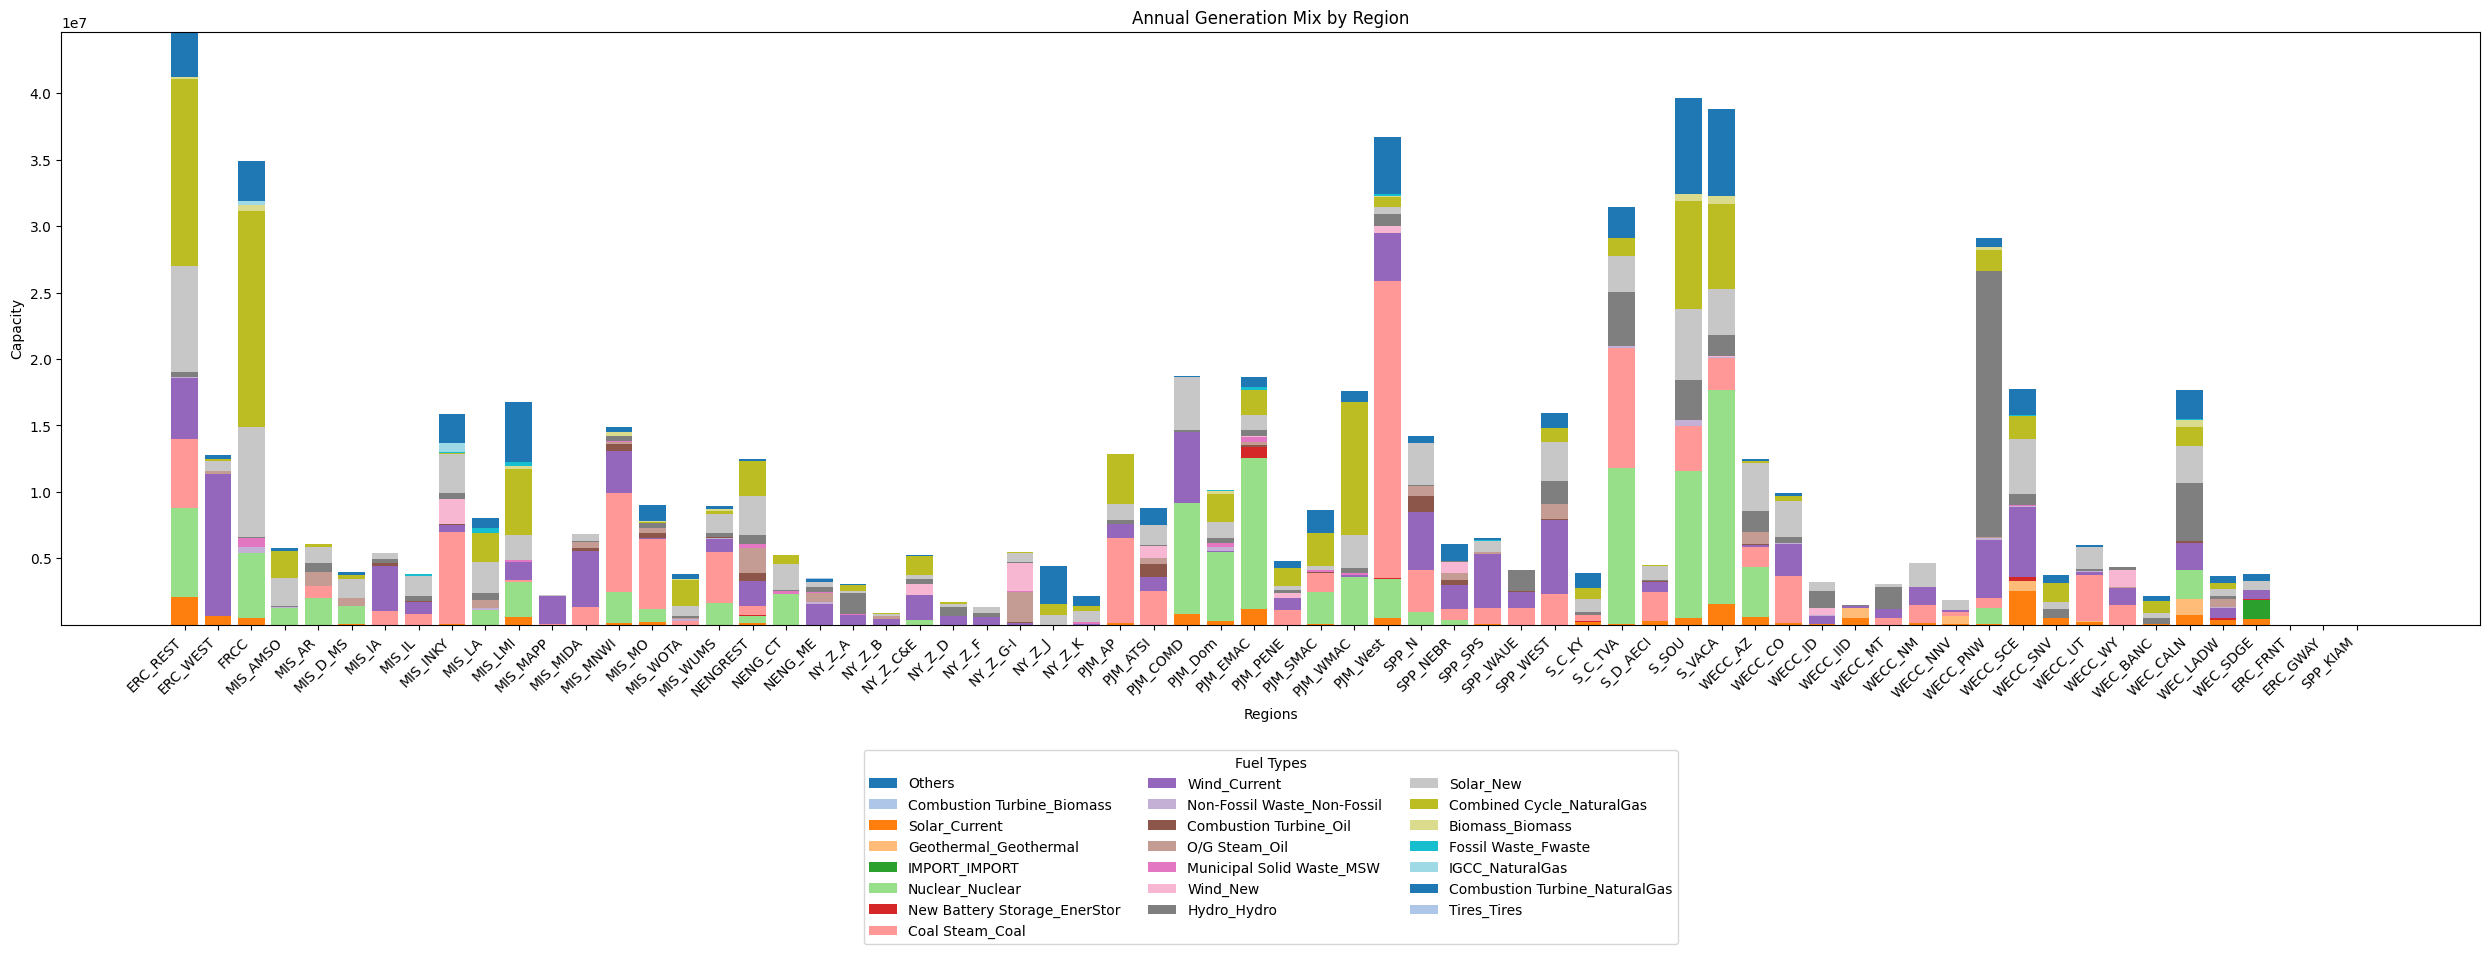

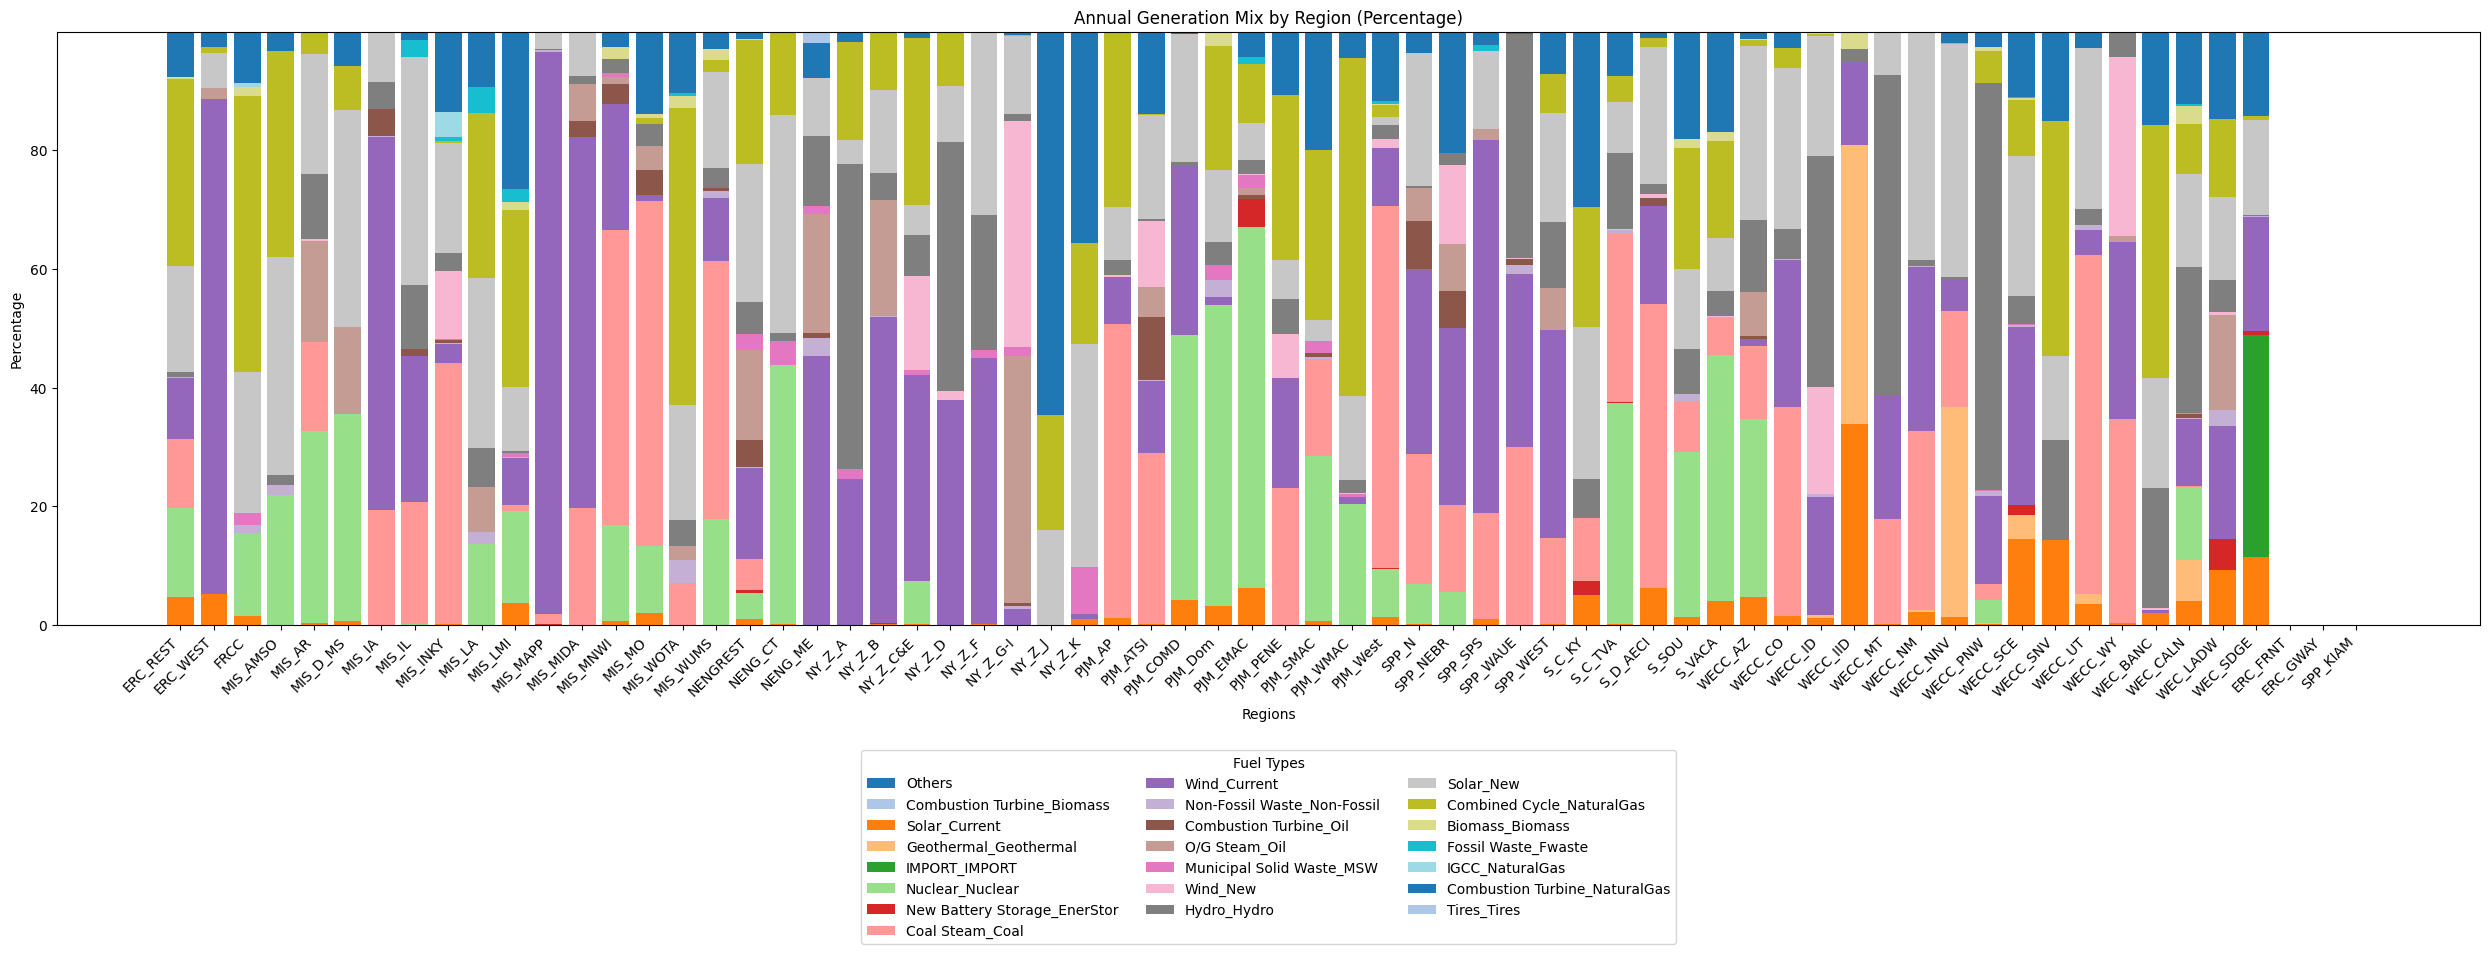

In [5]:
mix_by_region = analysis.get_annual_gen_mix_by_region()
analysis.plot_stacked_bar_chart(mix_by_region, percentage=False)
analysis.plot_stacked_bar_chart(mix_by_region, percentage=True)